# AIT 511 Project II - Forest Cover Type

### Introduction
The Forest Cover Type dataset contains over 580,000 observations from the Roosevelt National Forest in Colorado, where each 30m × 30m land segment is described using cartographic features such as elevation, slope, soil type, wilderness area, hillshade values, and distances to water, roads, and fire points. The goal of this project is to build machine learning models that can predict the forest cover type (seven possible classes) using these environmental and topographical attributes. The workflow involves performing exploratory data analysis to understand feature distributions and relationships, preprocessing the data by scaling numerical variables and keeping soil and wilderness indicators intact, and training three models—Logistic Regression, SVM, and a Neural Network—using hyperparameter tuning. Their performance is then compared using accuracy, AUC scores, and confusion matrices to identify the best model. Overall, the project shows how environmental tabular data can effectively support ecological modeling and forest management.

## 1.Loading Dataset



In [1]:
import pandas as pd
import numpy as np

SEED = 42
np.random.seed(SEED)

df = pd.read_csv('covtype.csv')

## 2.EDA & Visualizations

In [2]:
df.head(15)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


C:\Users\Swarnendu Sekhar Das\AppData\Local\Temp\ipykernel_5284\2040601819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cover_Type', data=df, palette='viridis')


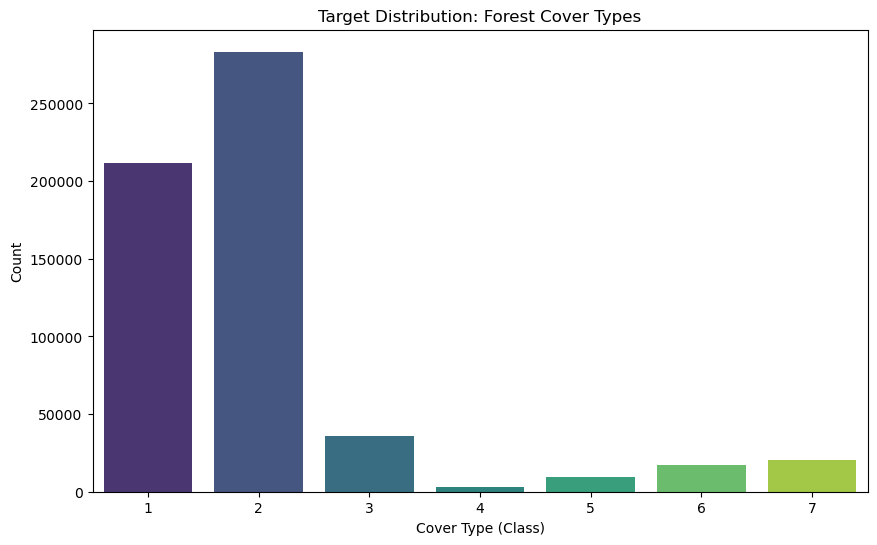

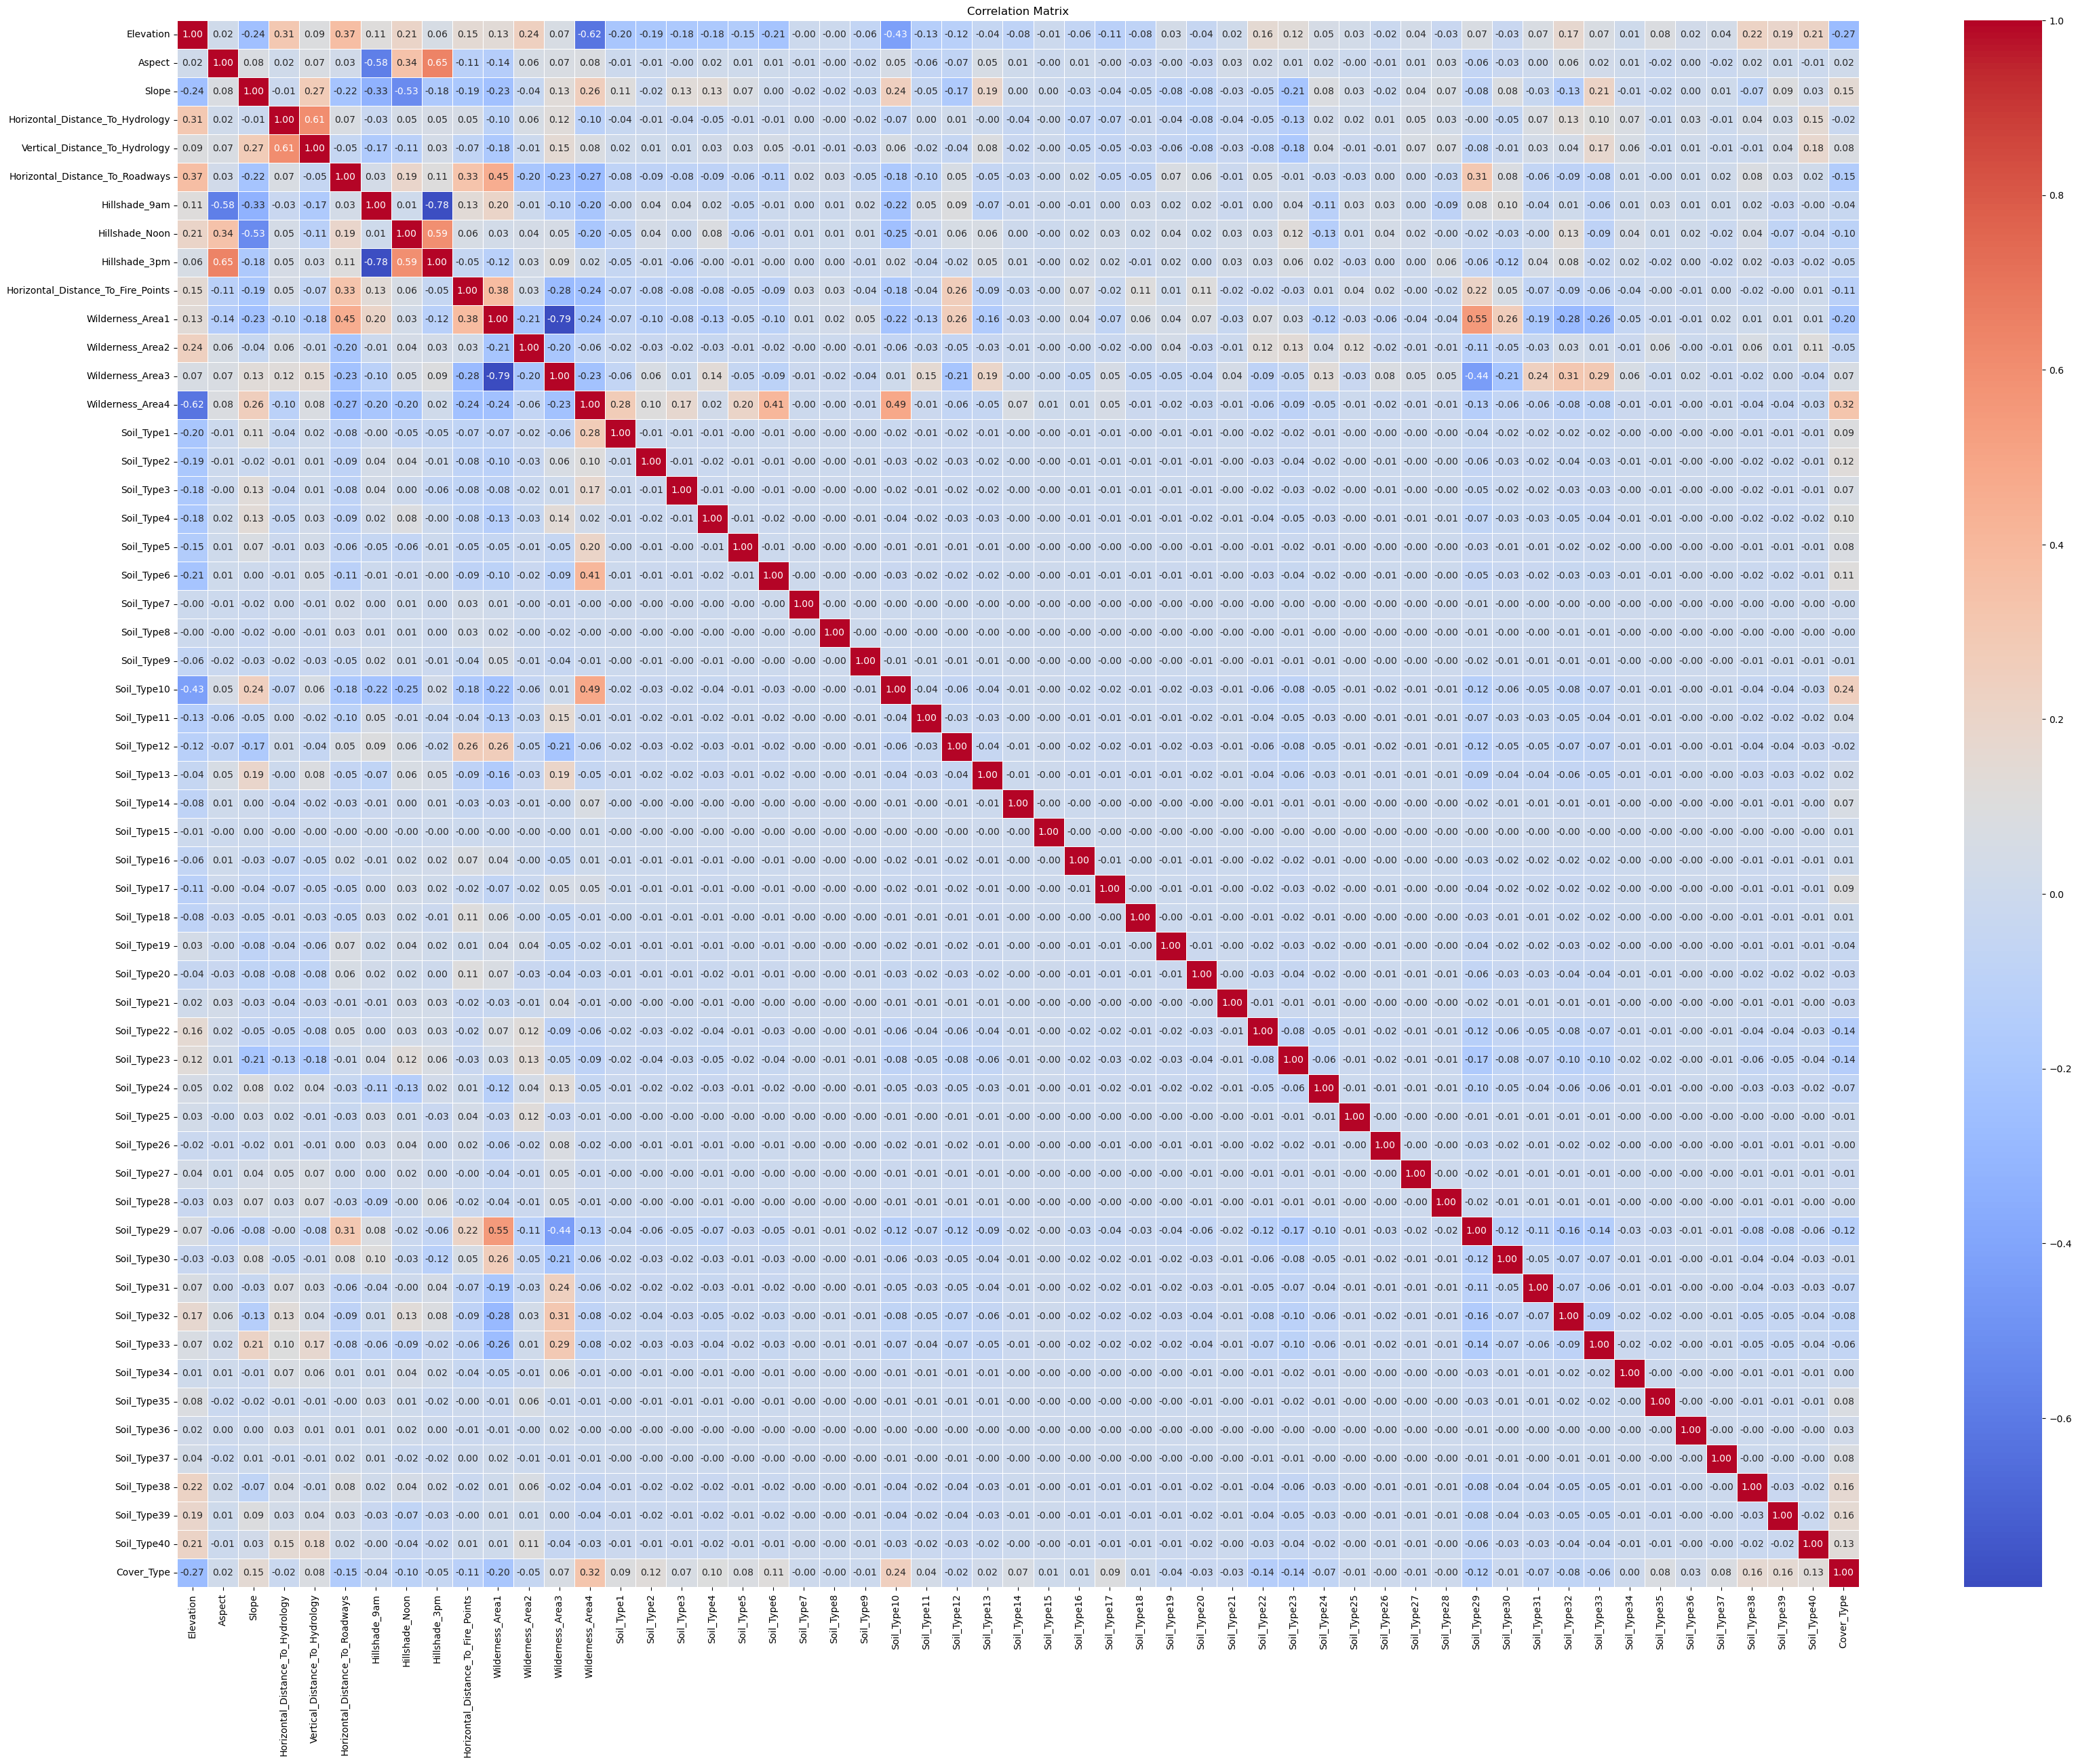

C:\Users\Swarnendu Sekhar Das\AppData\Local\Temp\ipykernel_5284\2040601819.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette='Set2')


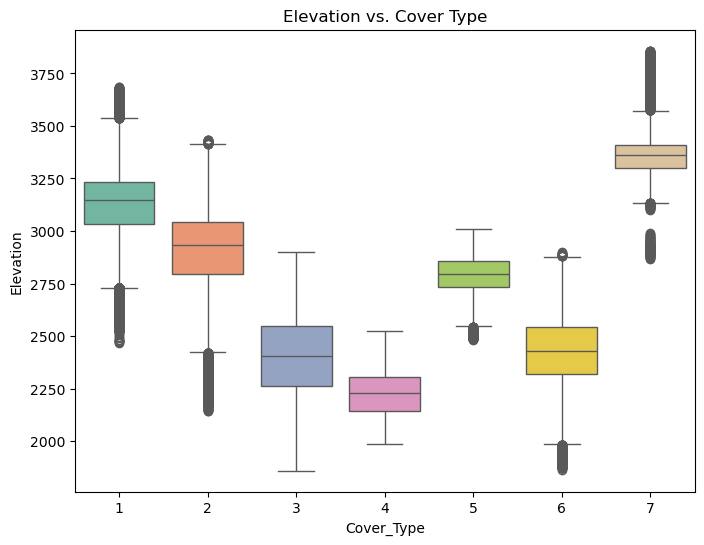

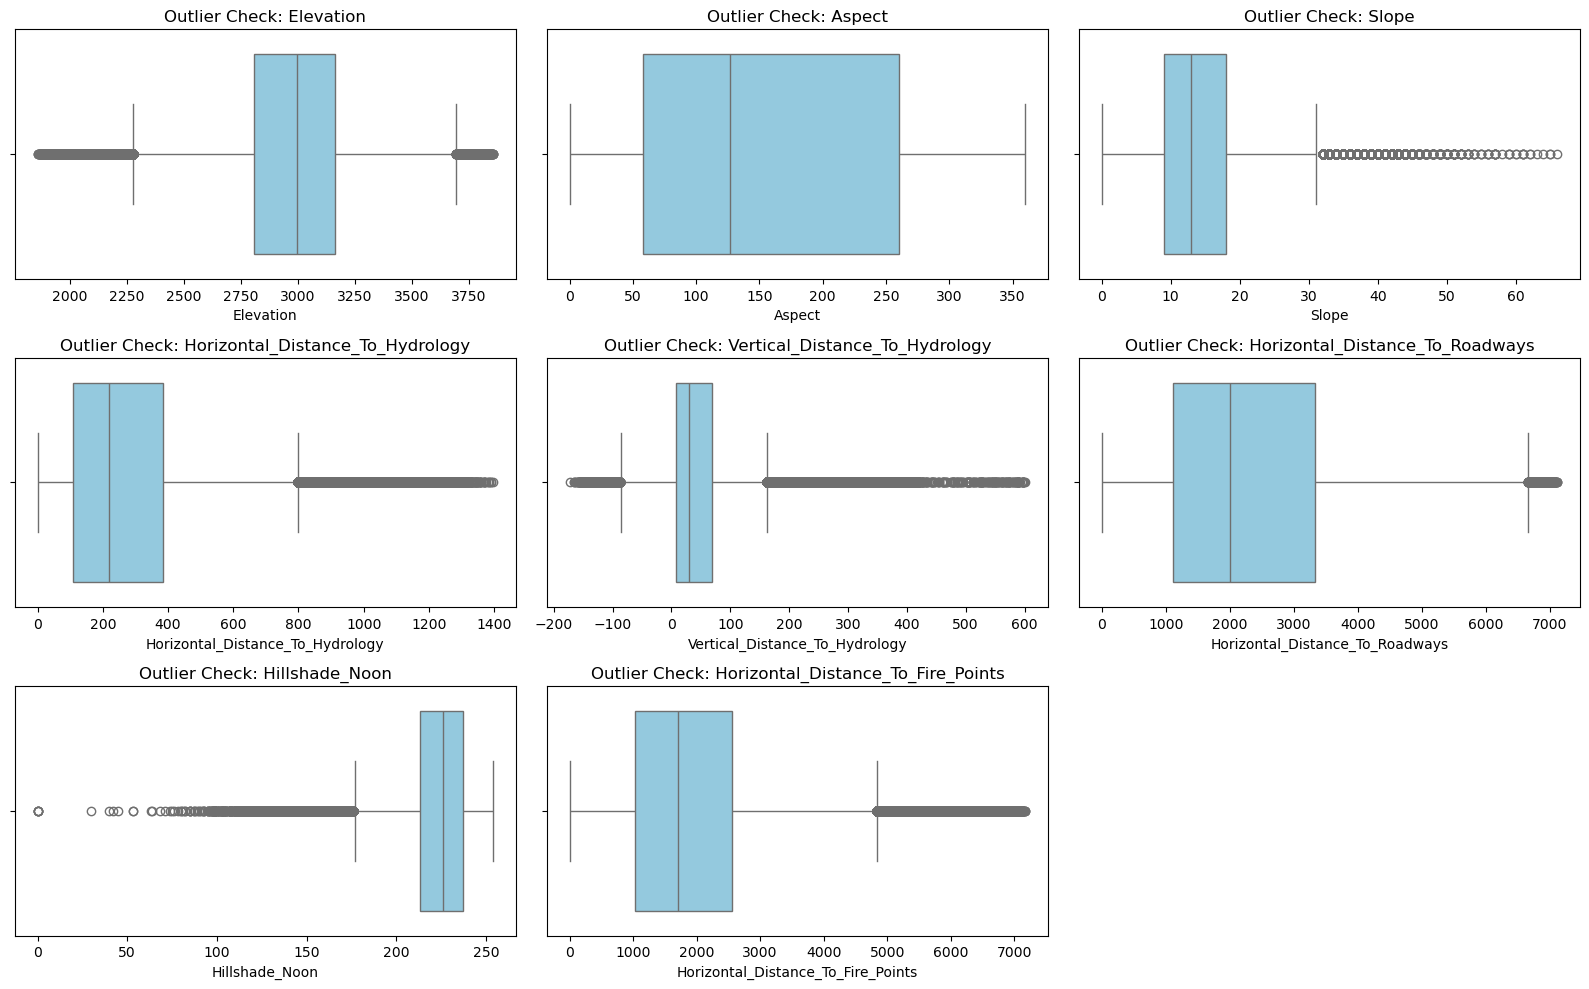

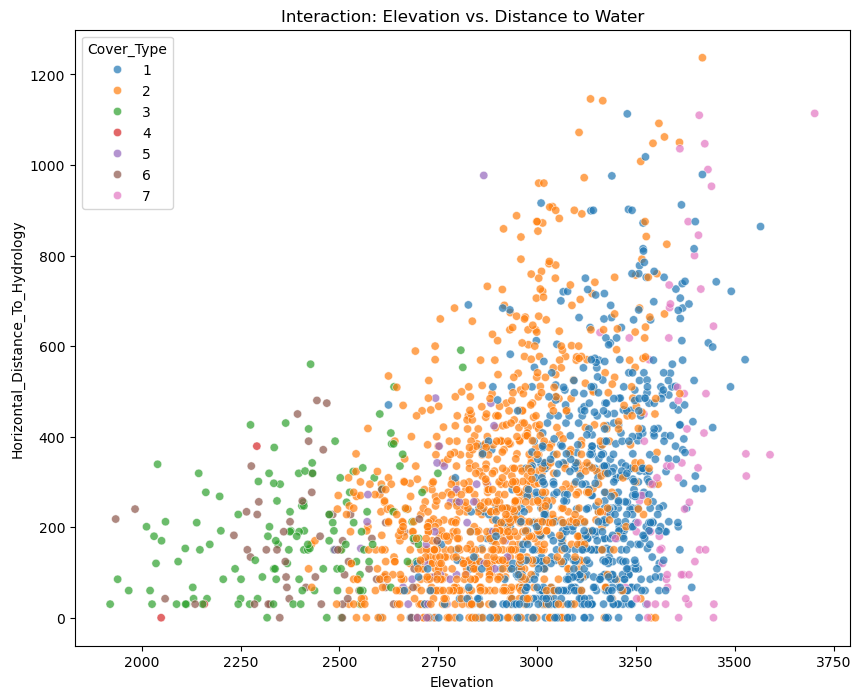

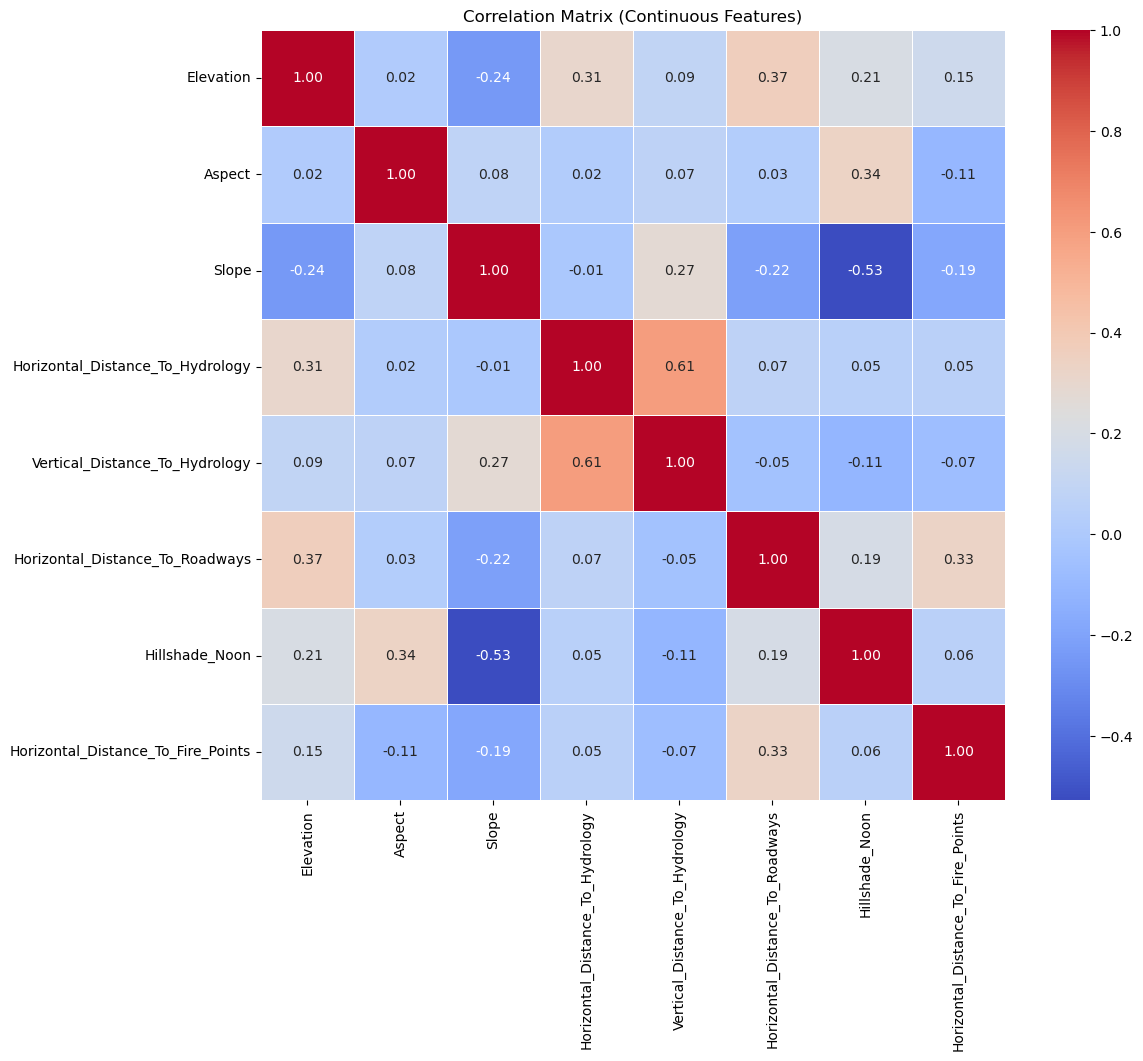

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Cover_Type', data=df, palette='viridis')
plt.title('Target Distribution: Forest Cover Types')
plt.xlabel('Cover Type (Class)')
plt.ylabel('Count')
plt.savefig('1_initial_target_dist.png')
plt.show()


plt.figure(figsize=(40, 30))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig('2_initial_correlation.png')
plt.show()



plt.figure(figsize=(8, 6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette='Set2')
plt.title('Elevation vs. Cover Type')
plt.savefig('3_elevation_boxplot.png')
plt.show()


continuous_cols = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_Noon',
    'Horizontal_Distance_To_Fire_Points'
]

plt.figure(figsize=(16, 10))
for i, col in enumerate(continuous_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Outlier Check: {col}')
plt.tight_layout()
plt.savefig('4_outliers_boxplot.png')
plt.show()


plt.figure(figsize=(10, 8))
subset = df.sample(2000, random_state=SEED)
sns.scatterplot(
    x='Elevation',
    y='Horizontal_Distance_To_Hydrology',
    hue='Cover_Type',
    palette='tab10',
    data=subset,
    alpha=0.7
)
plt.title('Interaction: Elevation vs. Distance to Water')
plt.savefig('5_interaction_plot.png')
plt.show()


plt.figure(figsize=(12, 10))
sns.heatmap(df[continuous_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Continuous Features)')
plt.savefig('6_correlation.png')
plt.show()


### Conclusion from EDA
**1. Target distribution is imbalanced**

Most samples belong to Cover Types 1 and 2, while classes like 4 and 5 have very few samples.

**2. No missing values in the dataset**

All 55 features have zero missing entries, so no cleaning or imputation is required.

**3. Elevation clearly separates forest cover types**

From the elevation boxplot, Cover Type 7 appears at the highest elevations, Types 3 and 4 occur at lower elevations, and Types 1, 2, and 5 fall in the middle. This makes elevation a very important feature.

**4. Most features are not strongly correlated**

The correlation heatmap shows that continuous features have weak correlations with each other, hillshade features are moderately related, and distance features act independently. This means multicollinearity is low, which is good for modeling.

**5. Strong interactions between terrain and water distance**

The scatterplot of elevation vs. distance to hydrology shows clear clusters for different cover types. For example, Types 1 and 2 appear in mid-elevations near water, while Type 7 appears more at high elevations. Terrain and water distance strongly influence cover type.

**6. Outliers reflect natural geographic variation**

Outlier plots show long-distance ranges to roads or fire points and normal variation in slope and aspect. These are natural environmental variations, not errors, so no removal is needed.

## 3.Data Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=SEED, stratify=y_encoded
)

binary_cols = [col for col in X.columns if col.startswith('Soil_Type') or col.startswith('Wilderness')]
continuous_cols = [col for col in X.columns if col not in binary_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('cat', 'passthrough', binary_cols)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## 4. Model Training and Hyperparameter Tuning - Logistic Regression

C:\Users\Swarnendu Sekhar Das\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Swarnendu Sekhar Das\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Logistic Regression Parameters: {'C': 100}
Logistic Regression Accuracy: 0.7235


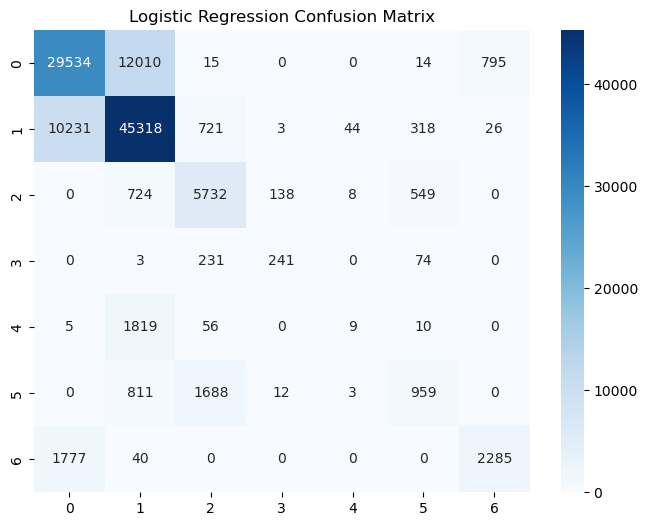

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

param_grid_lr = {'C': [1, 10, 100]}

lr = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200, random_state=SEED)

grid_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train_processed, y_train)

best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_processed)
acc_lr = accuracy_score(y_test, y_pred_lr)

print(f"Best Logistic Regression Parameters: {grid_lr.best_params_}")
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.savefig('7_lr_cm.png')
plt.show()

## 5. Model Training and Hyperparameter Tuning - SVM

Best SVM Parameters: {'C': 100, 'gamma': 'scale'}
SVM Accuracy: 0.8219


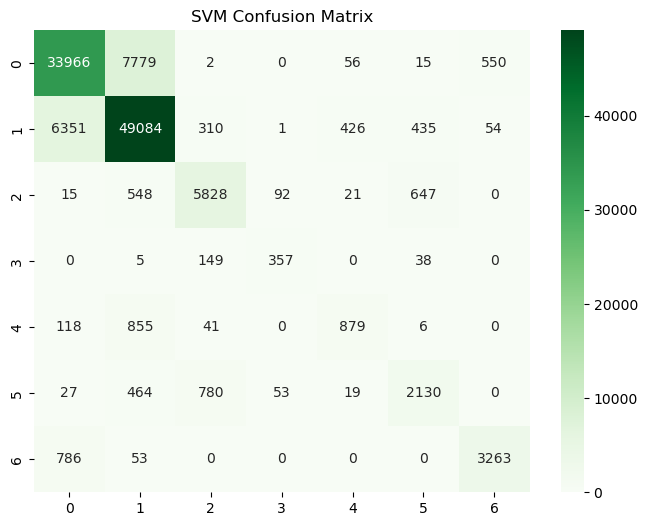

In [9]:
from sklearn.svm import SVC

X_sub, _, y_sub, _ = train_test_split(
    X_train_processed, y_train, train_size=20000, stratify=y_train, random_state=SEED
)

param_grid_svm = {'C': [10, 100], 'gamma': ['scale', 0.1]}
svm = SVC(kernel='rbf', probability=True, random_state=SEED)

grid_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_sub, y_sub)

best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_processed)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"Best SVM Parameters: {grid_svm.best_params_}")
print(f"SVM Accuracy: {acc_svm:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix')
plt.savefig('8_svm_cm.png')
plt.show()

## 6. Model Training and Hyperparameter Tuning - Multilayer Perceptron Neural Network

C:\Users\Swarnendu Sekhar Das\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9654 - accuracy: 0.7457 - loss: 0.6175 - val_AUC: 0.9809 - val_accuracy: 0.8092 - val_loss: 0.4500 - learning_rate: 0.0010
Epoch 2/100
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - AUC: 0.9777 - accuracy: 0.7942 - loss: 0.4830 - val_AUC: 0.9854 - val_accuracy: 0.8358 - val_loss: 0.3937 - learning_rate: 0.0010
Epoch 3/100
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - AUC: 0.9814 - accuracy: 0.8142 - loss: 0.4393 - val_AUC: 0.9880 - val_accuracy: 0.8533 - val_loss: 0.3579 - learning_rate: 0.0010
Epoch 4/100
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - AUC: 0.9836 - accuracy: 0.8284 - loss: 0.4106 - val_AUC: 0.9894 - val_accuracy: 0.8639 - val_loss: 0.3323 - learning_rate: 0.0010
Epoch 5/100
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - AUC: 0.9851 - accuracy: 0.8366 - loss: 0.3902 - val_AUC: 0.9907 - val_accuracy: 0.8727 - val_loss: 0.3113 - learning_rate: 0.0010
Epoch 6/100
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - AU

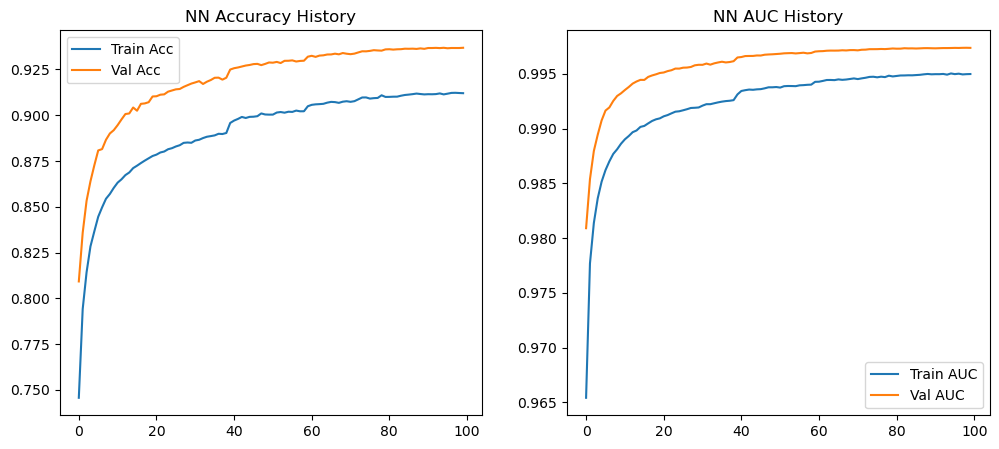

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

tf.random.set_seed(SEED)

if 'X_train_processed' in locals():
    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)

    model = Sequential([
        # Input Layer 
        Dense(512, activation='relu', input_shape=(X_train_processed.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        
        # Hidden Layer 1
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        # Hidden Layer 2
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        # Hidden Layer 3
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        
        # Output Layer
        Dense(7, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-5)
    early_stop = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

    history = model.fit(
        X_train_processed, y_train_cat,
        validation_split=0.2,
        epochs=100,           
        batch_size=128,       
        callbacks=[reduce_lr, early_stop],
        verbose=1
    )

    y_prob_nn = model.predict(X_test_processed)
    y_pred_nn = np.argmax(y_prob_nn, axis=1)

    acc_nn = accuracy_score(y_test, y_pred_nn)
    auc_nn = roc_auc_score(y_test_cat, y_prob_nn, multi_class='ovr', average='weighted')

    print(f"Neural Network Accuracy: {acc_nn:.4f}")
    print(f"Neural Network AUC: {auc_nn:.4f}")

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('NN Accuracy History')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    auc_keys = [k for k in history.history.keys() if 'auc' in k.lower() and 'val' not in k]
    
    if auc_keys:
        auc_key = auc_keys[0] 
        plt.plot(history.history[auc_key], label='Train AUC')
        val_auc_key = f"val_{auc_key}"
        if val_auc_key in history.history:
            plt.plot(history.history[val_auc_key], label='Val AUC')
        
        plt.title('NN AUC History')
        plt.legend()

    plt.savefig('9_nn_history.png')
    plt.show()

## 7. Final Comparisons

                 Model  Accuracy  AUC Score
0  Logistic Regression  0.723544   0.870449
1         SVM (Subset)  0.821898   0.936426
2       Neural Network  0.936602   0.991813


C:\Users\Swarnendu Sekhar Das\AppData\Local\Temp\ipykernel_5284\3383537319.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='magma')


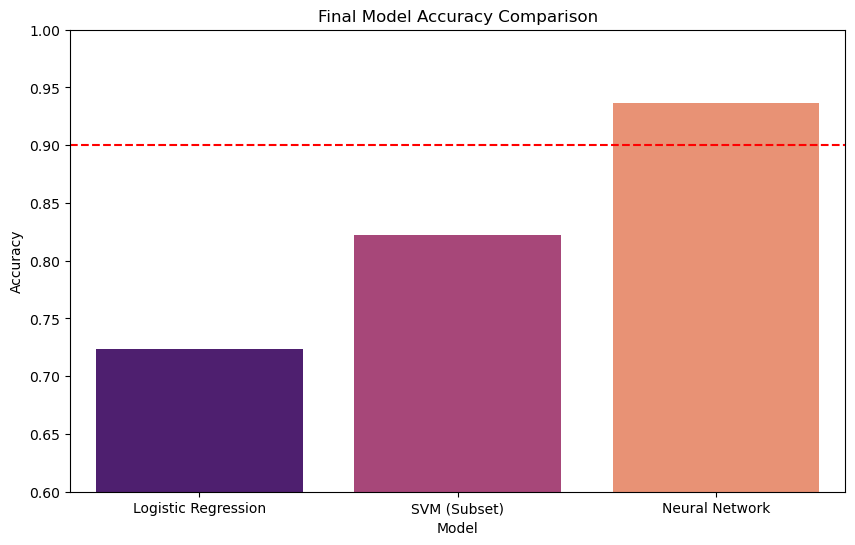

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     42368
           1       0.94      0.95      0.95     56661
           2       0.94      0.93      0.94      7151
           3       0.86      0.87      0.86       549
           4       0.82      0.83      0.82      1899
           5       0.88      0.89      0.88      3473
           6       0.93      0.95      0.94      4102

    accuracy                           0.94    116203
   macro avg       0.90      0.91      0.90    116203
weighted avg       0.94      0.94      0.94    116203



In [11]:
auc_lr = roc_auc_score(y_test, best_lr.predict_proba(X_test_processed), multi_class='ovr', average='weighted')
auc_svm = roc_auc_score(y_test, best_svm.predict_proba(X_test_processed), multi_class='ovr', average='weighted')

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM (Subset)', 'Neural Network'],
    'Accuracy': [acc_lr, acc_svm, acc_nn],
    'AUC Score': [auc_lr, auc_svm, auc_nn]
})

print(results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results, palette='magma')
plt.axhline(0.9, color='red', linestyle='--', label='90% Target')
plt.ylim(0.6, 1.0)
plt.title('Final Model Accuracy Comparison')
plt.savefig('10_final_comparison.png')
plt.show()

print(classification_report(y_test, y_pred_nn))

## 8.Conclusion
The objective of this project was to classify forest cover types using a large dataset of 581,012
samples described by 55 environmental, geographical, and soil-related features. Exploratory
data analysis showed that elevation was a major differentiating factor among cover types, the
dataset exhibited class imbalance, continuous features had low multicollinearity, and soil and
wilderness indicators contributed meaningful categorical information.
Three models—Logistic Regression, SVM, and a Neural Network—were trained on the processed data. Logistic Regression served as a simple baseline but was limited by its linear nature.
The SVM with an RBF kernel achieved stronger performance by modeling nonlinear boundaries.
The Neural Network produced the highest accuracy and ROC-AUC due to its deep architecture,
dropout regularization, batch normalization, and adaptive learning rate scheduling.
Overall, the results indicate that forest cover type classification is a complex nonlinear task,
and deep learning models are particularly effective at capturing the interactions between terrain,
soil characteristics, and hydrological features